#### Import libraries

In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#### Load the data

In [68]:
raw = pd.read_csv ('data.csv')
raw.head()

data = raw.copy()
data.head()

,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,40003,60000,1,0,0,0,0,0,1,5,...,0.0,0.00,0.49,0.0,1.74,39.92,0,0,11.00210,0
1,40007,140000,0,1,0,0,0,0,0,0,...,0.0,15.41,1.32,0.0,0.54,46.00,1,0,11.84940,1
2,40008,38000,0,1,0,0,0,0,1,1,...,0.0,8.16,5.57,0.0,1.55,45.87,0,0,10.54534,0
3,40010,110000,0,1,0,0,0,0,0,0,...,0.0,8.11,5.53,0.0,1.58,45.88,1,0,11.60824,1
4,40011,120000,0,1,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.40,46.00,1,0,11.69525,1


#### Create a subset

In [69]:
var_list = ['price_000','pop_dens','ses','house','area_m2','num_bath','pcn_green','homicides']
data = data[var_list].copy()

data.head(2)

,price_000,pop_dens,ses,house,area_m2,num_bath,pcn_green,homicides
0,60000,830.78,4,0,70,2,1.74,39.92
1,140000,826.75,4,1,257,4,0.54,46.00


##### Recoding SES

In [70]:
data['high_ses'] = np.where(data['ses']>=5, 1, 0)
data.head(2)

,price_000,pop_dens,ses,house,area_m2,num_bath,pcn_green,homicides,high_ses
0,60000,830.78,4,0,70,2,1.74,39.92,0
1,140000,826.75,4,1,257,4,0.54,46.00,0


##### Let's plot the histogram!

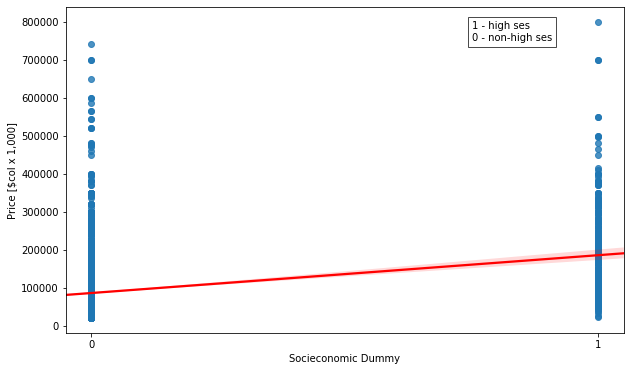

In [119]:
# Define your variables
x = data['high_ses']
y = data['price_000']
xlabel = 'Socieconomic Status'
ylabel = 'Price [$col x 1,000]'
color = 'red'

# Create the plot
plt.figure(figsize=(10,6)) # Determine plot size
ax = sns.regplot(x, y, line_kws = {'color':color}) #Determine line of best fit color

# Axis Titles
ax.set(xlabel=xlabel, ylabel=ylabel);

# y-axis formatting
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x))))

# x-axis formatting
positions = (0, 1) # Choose the position you want your labels
labels = ("0", "1") # Determine which labels you want in each position
plt.xticks(positions, labels)

# Add an explanatory textbox
plt.text(0.75, 750000, '1 - high ses\n0 - non-high ses', bbox=dict(facecolor='white', alpha=0.7)); # Set the labels